In [1]:
from data_utils import *
from helpers import *
from sketch_transfer import *
from model_1enc import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
hp = HParams()
hp.enc_hidden_size = 256  # 256
hp.dec_hidden_size = 512  # 512
hp.Nmax = 100
hp.save_every = 100
hp.wKL = 0.008
hp.dropout = 0.1
hp.KL_start = 0.01
hp.KL_delta = 0.003
hp.KL_min = 0.0
hp.lr = 0.001
hp.lr_decay = 0.998
hp.style_dim = 7
hp.enc_layers = 2
hp.Nz = 2   # latent dimension
hp.Nz_dec = hp.Nz # 1 encoder, 1 decoder
hp.M = 3 # gaussian mixture
dataset = MixData("data/line5.csv", ["data/deltas_transformed (2).csv", "data/deltas_transformed (3).csv"], \
                  n_styles=7, seg_len=100, window=100, smooth_iterations=5, cutoff=(15,40))
dataloader = DataLoader(dataset, batch_size=128, shuffle=True, num_workers=0)
model = SketchTransfer_nolabel(hp)

Loaded 189 segments of style 0
Shape: (189, 2, 100)
Loaded 211 segments of style 1
Shape: (211, 2, 100)
Loaded 210 segments of style 2
Shape: (210, 2, 100)
Loaded 221 segments of style 3
Shape: (221, 2, 100)
Loaded 203 segments of style 4
Shape: (203, 2, 100)
Loaded 147 segments of style 5
Shape: (147, 2, 100)
Loaded 282 segments of style 6
Shape: (282, 2, 100)


D:\Anaconda3\lib\site-packages\torch\nn\modules\rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [2]:
# guided five styles data, each style has 5 shapes
hp = HParams()
hp.enc_hidden_size = 256  # 256
hp.dec_hidden_size = 512  # 512
hp.Nmax = 100
hp.save_every = 100
hp.wKL = 0.01
hp.KL_start = 0.01
hp.KL_delta = 0.003
hp.KL_min = 0.0
hp.lr = 0.001
hp.lr_decay = 0.998
hp.style_dim = 5
hp.Nz = 2   # latent dimension
hp.Nz_dec = hp.Nz # 1 encoder, 1 decoder
hp.M = 3 # gaussian mixture
dataset = ControlRelative("data/line5.csv", n_styles=5, seg_len=hp.Nmax, window=100, smooth_iterations=5, cutoff=(10,50))
dataloader = DataLoader(dataset, batch_size=128, shuffle=True, num_workers=0)
model = SketchTransfer_enc_dec(hp)

Loaded 184 segments of style 0
Shape: (184, 2, 100)
Loaded 206 segments of style 1
Shape: (206, 2, 100)
Loaded 205 segments of style 2
Shape: (205, 2, 100)
Loaded 216 segments of style 3
Shape: (216, 2, 100)
Loaded 198 segments of style 4
Shape: (198, 2, 100)


In [3]:
for i in range(1201):
    model.train(dataloader, i)

D:\Dropbox (GaTech)\Dropbox (GaTech)\Research\MS Project\Draw_AI\sketch_transfer.py:101: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pi = F.softmax(pi.transpose(0,1).squeeze()).view(len_out,-1,self.hp.M)


Epoch 0 Loss KL 0.0008874941850081086 Loss R 9.44754695892334


KeyboardInterrupt: 

In [8]:
# guided five styles data, each style has 5 shapes
hp = HParams()
hp.save_every = 40
hp.wKL = 0.001
hp.KL_a = 3.0
hp.KL_start = 0.1
hp.KL_delta = 0.005
hp.KL_min = 0.0
hp.lr = 0.001
hp.lr_decay = 0.999
hp.style_dim = 5
hp.Nz = 4   # latent dimension
hp.Nz_dec = 2 * hp.Nz
hp.M = 3 # gaussian mixture
dataset = Guided("data/guided5.csv", n_styles=5, seg_len=100, window=30, smooth_iterations=3, cutoff=20)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=0)
model = SketchTransfer_enc2(hp)

Loaded 2361 segments of style 0
Shape: (2361, 4, 100)
Loaded 1622 segments of style 1
Shape: (1622, 4, 100)
Loaded 2434 segments of style 2
Shape: (2434, 4, 100)
Loaded 1243 segments of style 3
Shape: (1243, 4, 100)
Loaded 981 segments of style 4
Shape: (981, 4, 100)


In [9]:
def load_sketch_transfer_model(enc1, enc2, dec, hp):
    model = SketchTransfer_enc2(hp)
    saved_enc1 = torch.load(enc1)
    saved_enc2 = torch.load(enc2)
    saved_dec = torch.load(dec)
    model.encoder_control.load_state_dict(saved_enc1)
    model.encoder_stroke.load_state_dict(saved_enc2)
    model.decoder.load_state_dict(saved_dec)
    return model

hp.wKL = 0.001
hp.KL_a = 5.0
hp.KL_start = 1.0
hp.KL_delta = 0.005
hp.KL_min = 0.0
hp.lr = 0.0005
hp.lr_decay = 0.997
model = load_sketch_transfer_model("models/0128/sketch_encoder_control_sel_0.179211_epoch_800.pth", \
                                   "models/0128/sketch_encoder_stroke_sel_0.179211_epoch_800.pth", \
                                  "models/0128/sketch_decoder_sel_0.179211_epoch_800.pth", hp)
model.encoder_control.train(True)
model.encoder_stroke.train(True)
model.decoder.train(True)

LSTMDecoder(
  (fc_hc): Linear(in_features=8, out_features=256, bias=True)
  (lstm): LSTM(10, 128)
  (fc_params): Linear(in_features=128, out_features=18, bias=True)
)

In [10]:
for i in range(801, 1601):
    model.train(dataloader, i)

D:\Dropbox (GaTech)\Dropbox (GaTech)\Research\MS Project\Draw_AI\sketch_transfer.py:99: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pi = F.softmax(pi.transpose(0,1).squeeze()).view(len_out,-1,self.hp.M)


Epoch 801 Loss KLcontrol 0.02089906856417656 KLstroke 0.016731105744838715 Loss R 0.3725067377090454
Epoch 802 Loss KLcontrol 0.023210648447275162 KLstroke 0.0125925587490201 Loss R -1.26007878780365
Epoch 803 Loss KLcontrol 0.019031522795557976 KLstroke 0.00900707021355629 Loss R -0.05704112723469734
Epoch 804 Loss KLcontrol 0.01602795161306858 KLstroke 0.017045091837644577 Loss R 0.8912932872772217
Epoch 805 Loss KLcontrol 0.01915801502764225 KLstroke 0.012014053761959076 Loss R -1.8551580905914307
Epoch 806 Loss KLcontrol 0.01623961329460144 KLstroke 0.017884401604533195 Loss R 0.5822675228118896
Epoch 807 Loss KLcontrol 0.01620541699230671 KLstroke 0.01791796274483204 Loss R 0.658545196056366
Epoch 808 Loss KLcontrol 0.021833248436450958 KLstroke 0.008587771095335484 Loss R -2.164177417755127
Epoch 809 Loss KLcontrol 0.01597679778933525 KLstroke 0.011815331876277924 Loss R -2.2554054260253906
Epoch 810 Loss KLcontrol 0.017731154337525368 KLstroke 0.01710846647620201 Loss R 0.539008

Epoch 882 Loss KLcontrol 0.018275970593094826 KLstroke 0.03606458380818367 Loss R -0.39252418279647827
Epoch 883 Loss KLcontrol 0.01846141368150711 KLstroke 0.031126482412219048 Loss R -1.244568943977356
Epoch 884 Loss KLcontrol 0.01738816685974598 KLstroke 0.02266555279493332 Loss R -1.5032076835632324
Epoch 885 Loss KLcontrol 0.01791856437921524 KLstroke 0.021886605769395828 Loss R -3.0206823348999023
Epoch 886 Loss KLcontrol 0.016576722264289856 KLstroke 0.022904958575963974 Loss R -1.8119094371795654
Epoch 887 Loss KLcontrol 0.017335783690214157 KLstroke 0.025700118392705917 Loss R -1.7522125244140625
Epoch 888 Loss KLcontrol 0.019080638885498047 KLstroke 0.028787268325686455 Loss R -4.115817070007324
Epoch 889 Loss KLcontrol 0.01610988937318325 KLstroke 0.027390973642468452 Loss R -1.7345929145812988
Epoch 890 Loss KLcontrol 0.020645050331950188 KLstroke 0.03172248601913452 Loss R -1.8779582977294922
Epoch 891 Loss KLcontrol 0.02004954405128956 KLstroke 0.029400931671261787 Loss R

Epoch 963 Loss KLcontrol 0.01667811907827854 KLstroke 0.024029966443777084 Loss R -5.69902229309082
Epoch 964 Loss KLcontrol 0.01690136454999447 KLstroke 0.03804505988955498 Loss R -2.257218360900879
Epoch 965 Loss KLcontrol 0.015639321878552437 KLstroke 0.040195267647504807 Loss R -1.5057212114334106
Epoch 966 Loss KLcontrol 0.016234610229730606 KLstroke 0.0415860153734684 Loss R -0.7780503630638123
Epoch 967 Loss KLcontrol 0.018063578754663467 KLstroke 0.04341423138976097 Loss R -1.1567338705062866
Epoch 968 Loss KLcontrol 0.018824128434062004 KLstroke 0.03295927122235298 Loss R -2.0937552452087402
Epoch 969 Loss KLcontrol 0.017345787957310677 KLstroke 0.031959570944309235 Loss R -1.6597100496292114
Epoch 970 Loss KLcontrol 0.015000952407717705 KLstroke 0.03271572291851044 Loss R -2.0161824226379395
Epoch 971 Loss KLcontrol 0.019195126369595528 KLstroke 0.026747018098831177 Loss R -3.4680964946746826
Epoch 972 Loss KLcontrol 0.019480085000395775 KLstroke 0.039556052535772324 Loss R -

Epoch 1044 Loss KLcontrol 0.012119503691792488 KLstroke 0.021805256605148315 Loss R -1.3781414031982422
Epoch 1045 Loss KLcontrol 0.013489590026438236 KLstroke 0.016912562772631645 Loss R -2.4140405654907227
Epoch 1046 Loss KLcontrol 0.014025673270225525 KLstroke 0.03186609968543053 Loss R -2.0034635066986084
Epoch 1047 Loss KLcontrol 0.01257541123777628 KLstroke 0.026328973472118378 Loss R -2.515648603439331
Epoch 1048 Loss KLcontrol 0.012009791098535061 KLstroke 0.017227424308657646 Loss R -4.6312971115112305
Epoch 1049 Loss KLcontrol 0.012094465084373951 KLstroke 0.030233541503548622 Loss R 0.21349620819091797
Epoch 1050 Loss KLcontrol 0.012058233842253685 KLstroke 0.02090081013739109 Loss R -1.828693151473999
Epoch 1051 Loss KLcontrol 0.014658384956419468 KLstroke 0.02782142534852028 Loss R -1.3966153860092163
Epoch 1052 Loss KLcontrol 0.012865617871284485 KLstroke 0.0321844257414341 Loss R -1.1421644687652588
Epoch 1053 Loss KLcontrol 0.01646774634718895 KLstroke 0.028173523023724

Epoch 1124 Loss KLcontrol 0.011747593060135841 KLstroke 0.019385531544685364 Loss R -2.9271905422210693
Epoch 1125 Loss KLcontrol 0.00891883671283722 KLstroke 0.02420814335346222 Loss R -0.41831183433532715
Epoch 1126 Loss KLcontrol 0.010527249425649643 KLstroke 0.020396387204527855 Loss R -1.2589629888534546
Epoch 1127 Loss KLcontrol 0.010009455494582653 KLstroke 0.02783399261534214 Loss R -0.23317278921604156
Epoch 1128 Loss KLcontrol 0.012864505872130394 KLstroke 0.022657478228211403 Loss R -0.7271326184272766
Epoch 1129 Loss KLcontrol 0.01104006264358759 KLstroke 0.021944116801023483 Loss R -3.4077649116516113
Epoch 1130 Loss KLcontrol 0.012749136425554752 KLstroke 0.0167180635035038 Loss R -2.150975227355957
Epoch 1131 Loss KLcontrol 0.011101911775767803 KLstroke 0.03084857575595379 Loss R 2.8892836570739746
Epoch 1132 Loss KLcontrol 0.013119474984705448 KLstroke 0.019802628085017204 Loss R -3.458603858947754
Epoch 1133 Loss KLcontrol 0.011741813272237778 KLstroke 0.01651693880558

Epoch 1204 Loss KLcontrol 0.011240696534514427 KLstroke 0.023484058678150177 Loss R -0.9694408178329468
Epoch 1205 Loss KLcontrol 0.009271372109651566 KLstroke 0.025256281718611717 Loss R 1.0221693515777588
Epoch 1206 Loss KLcontrol 0.008460832759737968 KLstroke 0.024357784539461136 Loss R 0.138045072555542
Epoch 1207 Loss KLcontrol 0.012729668989777565 KLstroke 0.01689494401216507 Loss R -3.8247838020324707
Epoch 1208 Loss KLcontrol 0.01264986116439104 KLstroke 0.016631340608000755 Loss R -1.793981909751892
Epoch 1209 Loss KLcontrol 0.011112391017377377 KLstroke 0.016439756378531456 Loss R -2.539361000061035
Epoch 1210 Loss KLcontrol 0.00988052599132061 KLstroke 0.015070234425365925 Loss R -2.6292521953582764
Epoch 1211 Loss KLcontrol 0.009498278610408306 KLstroke 0.014617599546909332 Loss R -5.503781795501709
Epoch 1212 Loss KLcontrol 0.009036422707140446 KLstroke 0.0171126089990139 Loss R -2.378894329071045
Epoch 1213 Loss KLcontrol 0.009129391051828861 KLstroke 0.017153888940811157

Epoch 1284 Loss KLcontrol 0.011206667870283127 KLstroke 0.015670914202928543 Loss R -2.275221824645996
Epoch 1285 Loss KLcontrol 0.010583147406578064 KLstroke 0.013053899630904198 Loss R -1.5080857276916504
Epoch 1286 Loss KLcontrol 0.01142539456486702 KLstroke 0.015504286624491215 Loss R -2.847665309906006
Epoch 1287 Loss KLcontrol 0.009308261796832085 KLstroke 0.019431637600064278 Loss R -2.399266004562378
Epoch 1288 Loss KLcontrol 0.013794630765914917 KLstroke 0.01473004836589098 Loss R -2.7703452110290527
Epoch 1289 Loss KLcontrol 0.010957635939121246 KLstroke 0.01644173450767994 Loss R -2.2052974700927734
Epoch 1290 Loss KLcontrol 0.00839586928486824 KLstroke 0.012164301238954067 Loss R -2.050119161605835
Epoch 1291 Loss KLcontrol 0.00804828479886055 KLstroke 0.022614113986492157 Loss R -1.4095934629440308
Epoch 1292 Loss KLcontrol 0.011045139282941818 KLstroke 0.014151135459542274 Loss R -0.8440066576004028
Epoch 1293 Loss KLcontrol 0.0107842106372118 KLstroke 0.01121555827558040

Epoch 1364 Loss KLcontrol 0.008769672363996506 KLstroke 0.01171109825372696 Loss R -4.197115898132324
Epoch 1365 Loss KLcontrol 0.00829376745969057 KLstroke 0.01401040330529213 Loss R -0.6248147487640381
Epoch 1366 Loss KLcontrol 0.00773943355306983 KLstroke 0.02459089271724224 Loss R 1.5527877807617188
Epoch 1367 Loss KLcontrol 0.009720264934003353 KLstroke 0.01120465062558651 Loss R -3.874490261077881
Epoch 1368 Loss KLcontrol 0.009519278071820736 KLstroke 0.009228912182152271 Loss R -3.268754720687866
Epoch 1369 Loss KLcontrol 0.008170004934072495 KLstroke 0.012454616837203503 Loss R -3.27934193611145
Epoch 1370 Loss KLcontrol 0.00962408259510994 KLstroke 0.009877854958176613 Loss R -3.0908117294311523
Epoch 1371 Loss KLcontrol 0.008659214712679386 KLstroke 0.011671528220176697 Loss R -4.094128131866455
Epoch 1372 Loss KLcontrol 0.007422712165862322 KLstroke 0.013983688317239285 Loss R -2.158224105834961
Epoch 1373 Loss KLcontrol 0.009504812769591808 KLstroke 0.012956289574503899 Lo

Epoch 1444 Loss KLcontrol 0.007338446099311113 KLstroke 0.01548057422041893 Loss R -1.4934430122375488
Epoch 1445 Loss KLcontrol 0.006719582714140415 KLstroke 0.02090211771428585 Loss R -0.8614830374717712
Epoch 1446 Loss KLcontrol 0.007245862390846014 KLstroke 0.009451466612517834 Loss R -2.639688014984131
Epoch 1447 Loss KLcontrol 0.008292341604828835 KLstroke 0.00783261377364397 Loss R -2.196510076522827
Epoch 1448 Loss KLcontrol 0.009507719427347183 KLstroke 0.010252367705106735 Loss R -2.4940223693847656
Epoch 1449 Loss KLcontrol 0.008199342526495457 KLstroke 0.010686089284718037 Loss R -3.0035336017608643
Epoch 1450 Loss KLcontrol 0.00882971752434969 KLstroke 0.011627459898591042 Loss R -5.499120235443115
Epoch 1451 Loss KLcontrol 0.009363021701574326 KLstroke 0.011066669598221779 Loss R -5.819117069244385
Epoch 1452 Loss KLcontrol 0.010507417842745781 KLstroke 0.00999017246067524 Loss R -2.2406060695648193
Epoch 1453 Loss KLcontrol 0.010237127542495728 KLstroke 0.015059159137308

KeyboardInterrupt: 

In [ ]:
# guided five styles data, each style has 5 shapes
hp = HParams()
hp.save_every = 80
hp.wKL = 0.001
hp.KL_a = 5.0
hp.KL_start = 0.1
hp.KL_delta = 0.002
hp.KL_min = 0.0
hp.lr = 0.001
hp.lr_decay = 0.997
hp.style_dim = 5
hp.Nz = 4   # latent dimension
hp.Nz_dec = 2 * hp.Nz
hp.M = 3 # gaussian mixture
dataset = Guided("data/guided5.csv", n_styles=5, seg_len=100, window=20, smooth_iterations=3, cutoff=20)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True, num_workers=0)
model = SketchTransfer_enc2(hp)

for i in range(1601):
    model.train(dataloader, i)

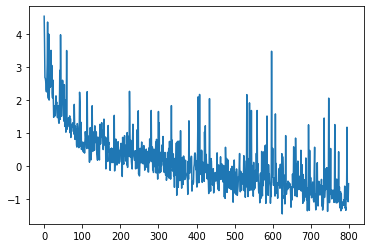

In [5]:
loss = []
with open("data/loss2.txt") as f:
    for line in f.readlines():
        loss.append(float(line.split(' ')[-1]))
plt.plot(loss)

In [2]:
hp = HParams()
hp.wKL = 0.001
hp.KL_a = 10.0
hp.KL_start = 0.1
hp.KL_delta = 0.005
hp.KL_min = 0.0
hp.lr = 0.001
hp.lr_decay = 0.999
dataset = SmoothCurve("data/threecurves.csv")
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=0)
model = SketchTransfer_enc2(hp)

Loaded 1715 segments of style 0
Shape: (1715, 4, 100)
Loaded 912 segments of style 1
Shape: (912, 4, 100)
Loaded 1469 segments of style 2
Shape: (1469, 4, 100)


In [3]:
for i in range(800):
    model.train(dataloader, i)

/home/artoriamaster_gmail_com/Draw_AI/sketch_transfer.py:99: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pi = F.softmax(pi.transpose(0,1).squeeze()).view(len_out,-1,self.hp.M)


Epoch 0 Loss KLcontrol 0.00018705532420426607 KLstroke 0.00017244755872525275 Loss R 4.535386562347412
Epoch 1 Loss KLcontrol 1.6630019672447816e-05 KLstroke 2.1101330275996588e-05 Loss R 3.739236354827881
Epoch 2 Loss KLcontrol 3.7268295272951946e-05 KLstroke 7.347821519942954e-05 Loss R 2.677556037902832
Epoch 3 Loss KLcontrol 0.00020353180298116058 KLstroke 0.00011532848293427378 Loss R 2.6553404331207275
Epoch 4 Loss KLcontrol 0.00024138421576935798 KLstroke 0.00016718916594982147 Loss R 2.5643057823181152
Epoch 5 Loss KLcontrol 0.000327551388181746 KLstroke 0.00017197559645865113 Loss R 2.31463623046875
Epoch 6 Loss KLcontrol 0.00033069870551116765 KLstroke 0.0002430211316095665 Loss R 2.2459943294525146
Epoch 7 Loss KLcontrol 8.155971590895206e-05 KLstroke 7.972378807608038e-05 Loss R 2.549982786178589
Epoch 8 Loss KLcontrol 0.0001415292063029483 KLstroke 0.0001287823251914233 Loss R 3.084597110748291
Epoch 9 Loss KLcontrol 0.00022516713943332434 KLstroke 0.00016280953423120081 L

Epoch 81 Loss KLcontrol 0.001891105785034597 KLstroke 0.03437644988298416 Loss R 0.806797444820404
Epoch 82 Loss KLcontrol 0.0018842642894014716 KLstroke 0.0357821062207222 Loss R 1.20991051197052
Epoch 83 Loss KLcontrol 0.002151598921045661 KLstroke 0.04897192865610123 Loss R 1.0431246757507324
Epoch 84 Loss KLcontrol 0.001913747051730752 KLstroke 0.04398540407419205 Loss R 1.1270045042037964
Epoch 85 Loss KLcontrol 0.0019276459934189916 KLstroke 0.042032450437545776 Loss R 0.629909873008728
Epoch 86 Loss KLcontrol 0.0019913811702281237 KLstroke 0.04584512114524841 Loss R 0.5732045769691467
Epoch 87 Loss KLcontrol 0.0014889066806063056 KLstroke 0.041329000145196915 Loss R 1.2849719524383545
Epoch 88 Loss KLcontrol 0.0017367299878969789 KLstroke 0.04777921363711357 Loss R 1.18838632106781
Epoch 89 Loss KLcontrol 0.0016219117678701878 KLstroke 0.04975948855280876 Loss R 0.9826179146766663
Epoch 90 Loss KLcontrol 0.0015659307828173041 KLstroke 0.04658402130007744 Loss R 1.020434498786926

Epoch 163 Loss KLcontrol 0.002056461526080966 KLstroke 0.10320544987916946 Loss R 0.594232976436615
Epoch 164 Loss KLcontrol 0.0020750663243234158 KLstroke 0.1162388026714325 Loss R 0.8453478813171387
Epoch 165 Loss KLcontrol 0.0020899418741464615 KLstroke 0.11303231865167618 Loss R 0.800564706325531
Epoch 166 Loss KLcontrol 0.0019318078411743045 KLstroke 0.14811170101165771 Loss R 0.4766697883605957
Epoch 167 Loss KLcontrol 0.0019516610773280263 KLstroke 0.11703358590602875 Loss R 0.13904108107089996
Epoch 168 Loss KLcontrol 0.002017166931182146 KLstroke 0.12142036110162735 Loss R 1.2274314165115356
Epoch 169 Loss KLcontrol 0.0019591660238802433 KLstroke 0.14113643765449524 Loss R 0.6579188108444214
Epoch 170 Loss KLcontrol 0.002053856151178479 KLstroke 0.13792665302753448 Loss R 0.7136706113815308
Epoch 171 Loss KLcontrol 0.002298633335158229 KLstroke 0.13771264255046844 Loss R 0.4119873046875
Epoch 172 Loss KLcontrol 0.002340109320357442 KLstroke 0.15252606570720673 Loss R 0.4854263

Epoch 244 Loss KLcontrol 0.0026049248408526182 KLstroke 0.10655905306339264 Loss R 1.0970596075057983
Epoch 245 Loss KLcontrol 0.002651711693033576 KLstroke 0.11678699404001236 Loss R 0.006593925878405571
Epoch 246 Loss KLcontrol 0.00259105721488595 KLstroke 0.10674972832202911 Loss R 0.36219313740730286
Epoch 247 Loss KLcontrol 0.0029127623420208693 KLstroke 0.12163243442773819 Loss R 1.6720649003982544
Epoch 248 Loss KLcontrol 0.002979707671329379 KLstroke 0.12052570283412933 Loss R -0.2450583428144455
Epoch 249 Loss KLcontrol 0.0029594588559120893 KLstroke 0.11357804387807846 Loss R 0.40505585074424744
Epoch 250 Loss KLcontrol 0.0027278116904199123 KLstroke 0.10307066887617111 Loss R -0.30090025067329407
Epoch 251 Loss KLcontrol 0.002684589009732008 KLstroke 0.10852238535881042 Loss R 0.01395757682621479
Epoch 252 Loss KLcontrol 0.0026703302282840014 KLstroke 0.11426685750484467 Loss R 0.5363340377807617
Epoch 253 Loss KLcontrol 0.0027570505626499653 KLstroke 0.13087591528892517 Los

Epoch 325 Loss KLcontrol 0.002856155391782522 KLstroke 0.0695083886384964 Loss R -0.3130726218223572
Epoch 326 Loss KLcontrol 0.002925044624134898 KLstroke 0.07924937456846237 Loss R 0.29250088334083557
Epoch 327 Loss KLcontrol 0.002663400722667575 KLstroke 0.06805066019296646 Loss R 0.532383382320404
Epoch 328 Loss KLcontrol 0.0027201815973967314 KLstroke 0.06523296236991882 Loss R -0.36674201488494873
Epoch 329 Loss KLcontrol 0.002827672054991126 KLstroke 0.0735960453748703 Loss R 0.746012270450592
Epoch 330 Loss KLcontrol 0.002724922727793455 KLstroke 0.07080942392349243 Loss R 0.08385322988033295
Epoch 331 Loss KLcontrol 0.0026921769604086876 KLstroke 0.0644870325922966 Loss R -0.04121048003435135
Epoch 332 Loss KLcontrol 0.0029869987629354 KLstroke 0.07872429490089417 Loss R -0.396325021982193
Epoch 333 Loss KLcontrol 0.0031867981888353825 KLstroke 0.0737818107008934 Loss R 0.08484701067209244
Epoch 334 Loss KLcontrol 0.00271232845261693 KLstroke 0.0699743703007698 Loss R 1.828929

Epoch 406 Loss KLcontrol 0.0027006331365555525 KLstroke 0.05516153946518898 Loss R -0.5075552463531494
Epoch 407 Loss KLcontrol 0.002580369124189019 KLstroke 0.05954006686806679 Loss R -0.27557453513145447
Epoch 408 Loss KLcontrol 0.0026920305099338293 KLstroke 0.07017425447702408 Loss R 2.16756534576416
Epoch 409 Loss KLcontrol 0.0025317484978586435 KLstroke 0.06023911014199257 Loss R -0.06390094012022018
Epoch 410 Loss KLcontrol 0.002810455858707428 KLstroke 0.05917665362358093 Loss R -0.02355538308620453
Epoch 411 Loss KLcontrol 0.0027934499084949493 KLstroke 0.053034476935863495 Loss R -0.11435159295797348
Epoch 412 Loss KLcontrol 0.0027847790624946356 KLstroke 0.055525042116642 Loss R -0.258794367313385
Epoch 413 Loss KLcontrol 0.0027116923592984676 KLstroke 0.0589500367641449 Loss R 0.4801430106163025
Epoch 414 Loss KLcontrol 0.0028339216951280832 KLstroke 0.0555252805352211 Loss R 0.4434296190738678
Epoch 415 Loss KLcontrol 0.0027403165586292744 KLstroke 0.05811755359172821 Loss

Epoch 486 Loss KLcontrol 0.00296305981464684 KLstroke 0.05537869408726692 Loss R -0.6742562055587769
Epoch 487 Loss KLcontrol 0.0029705874621868134 KLstroke 0.06026080623269081 Loss R -0.21669450402259827
Epoch 488 Loss KLcontrol 0.003134407103061676 KLstroke 0.05886751785874367 Loss R -0.16526007652282715
Epoch 489 Loss KLcontrol 0.0028651487082242966 KLstroke 0.054034121334552765 Loss R -0.5143282413482666
Epoch 490 Loss KLcontrol 0.0028021649923175573 KLstroke 0.04946037381887436 Loss R -0.08512935787439346
Epoch 491 Loss KLcontrol 0.0029585016891360283 KLstroke 0.048327334225177765 Loss R -0.7131674289703369
Epoch 492 Loss KLcontrol 0.0028380227740854025 KLstroke 0.0524686723947525 Loss R -0.2956230044364929
Epoch 493 Loss KLcontrol 0.0029112505726516247 KLstroke 0.05355135723948479 Loss R -0.008378238417208195
Epoch 494 Loss KLcontrol 0.003065831260755658 KLstroke 0.056016214191913605 Loss R -0.33616670966148376
Epoch 495 Loss KLcontrol 0.002893188502639532 KLstroke 0.050788275897

Epoch 566 Loss KLcontrol 0.003303291043266654 KLstroke 0.06255659461021423 Loss R -1.113733172416687
Epoch 567 Loss KLcontrol 0.0030720357317477465 KLstroke 0.059526294469833374 Loss R -0.27377596497535706
Epoch 568 Loss KLcontrol 0.0029417749028652906 KLstroke 0.056110281497240067 Loss R -0.2131381779909134
Epoch 569 Loss KLcontrol 0.00300587248057127 KLstroke 0.05848146229982376 Loss R -0.533383846282959
Epoch 570 Loss KLcontrol 0.0032325878273695707 KLstroke 0.05704699829220772 Loss R -0.9708723425865173
Epoch 571 Loss KLcontrol 0.0031299160327762365 KLstroke 0.059294335544109344 Loss R 0.44112831354141235
Epoch 572 Loss KLcontrol 0.003142328467220068 KLstroke 0.05340530723333359 Loss R -0.7135016322135925
Epoch 573 Loss KLcontrol 0.0031892932020127773 KLstroke 0.052367061376571655 Loss R -0.9012628793716431
Epoch 574 Loss KLcontrol 0.003187979804351926 KLstroke 0.052562639117240906 Loss R -0.10859078168869019
Epoch 575 Loss KLcontrol 0.00303635373711586 KLstroke 0.05660058930516243

Epoch 646 Loss KLcontrol 0.003057663096114993 KLstroke 0.053164590150117874 Loss R -0.6002819538116455
Epoch 647 Loss KLcontrol 0.003189972136169672 KLstroke 0.05202920734882355 Loss R -0.845201313495636
Epoch 648 Loss KLcontrol 0.00328635610640049 KLstroke 0.05018750950694084 Loss R -1.247213363647461
Epoch 649 Loss KLcontrol 0.0031826631166040897 KLstroke 0.05028337985277176 Loss R -0.6776303052902222
Epoch 650 Loss KLcontrol 0.0031771876383572817 KLstroke 0.05427517741918564 Loss R -0.6255473494529724
Epoch 651 Loss KLcontrol 0.0033093802630901337 KLstroke 0.05589190870523453 Loss R -1.0269036293029785
Epoch 652 Loss KLcontrol 0.0030466862954199314 KLstroke 0.05683188885450363 Loss R -0.24380698800086975
Epoch 653 Loss KLcontrol 0.0031780831050127745 KLstroke 0.05678399279713631 Loss R -0.6611611247062683
Epoch 654 Loss KLcontrol 0.003250626614317298 KLstroke 0.0539492592215538 Loss R -0.5654767751693726
Epoch 655 Loss KLcontrol 0.0032646057661622763 KLstroke 0.05627913773059845 Los

Epoch 726 Loss KLcontrol 0.0033271287102252245 KLstroke 0.049070101231336594 Loss R -0.7239040732383728
Epoch 727 Loss KLcontrol 0.003272565081715584 KLstroke 0.04743064567446709 Loss R -0.8282656669616699
Epoch 728 Loss KLcontrol 0.003291207365691662 KLstroke 0.04471687972545624 Loss R -0.40487897396087646
Epoch 729 Loss KLcontrol 0.0032757222652435303 KLstroke 0.047102171927690506 Loss R -1.211685061454773
Epoch 730 Loss KLcontrol 0.003067067824304104 KLstroke 0.05159344524145126 Loss R -0.6033939123153687
Epoch 731 Loss KLcontrol 0.0032360064797103405 KLstroke 0.048904504626989365 Loss R -1.333998441696167
Epoch 732 Loss KLcontrol 0.0032399650663137436 KLstroke 0.051842302083969116 Loss R -1.2415345907211304
Epoch 733 Loss KLcontrol 0.0035023202653974295 KLstroke 0.044799190014600754 Loss R -1.1359789371490479
Epoch 734 Loss KLcontrol 0.0034432546235620975 KLstroke 0.04853023588657379 Loss R -0.6493884325027466
Epoch 735 Loss KLcontrol 0.0031835236586630344 KLstroke 0.04928395524621

Encoded style:  [1. 0. 0.]


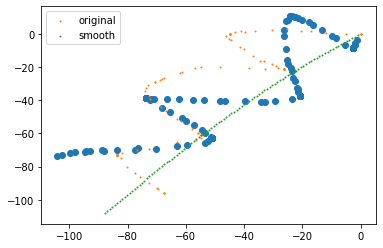

In [9]:
model.hp.temperature = 0.8
idx = 590
data, style = dataset[idx]
inputs = torch.FloatTensor(data).cuda().unsqueeze(0).permute(2, 0, 1)
labels = torch.FloatTensor(style).cuda().unsqueeze(0)
xs, ys, dx, dy = model.test_reconstruction(inputs, labels)
plt.scatter(xs, ys)
#controlx = np.cumsum(controldx)
#controly = np.cumsum(controldy)
#plt.plot(controlx, controly)
dataset.visualize(idx)
#plt.plot(dx)
#plt.plot(dy)
#dataset.visualize_d(idx)

In [22]:
def scatter_latent_control(dataset, style, color):
    x1 = []
    x2 = []
    for i in range(len(dataset)):
        data, labels = dataset[i]
        if labels[style] < 0.5:
            continue
        inputs = torch.FloatTensor(data[2:, :]).cuda().unsqueeze(0).permute(2, 0, 1)
        labels = torch.FloatTensor(labels).cuda().unsqueeze(0)

        model.encoder_control.train(False)
        z, mu, sigma_hat = model.encoder_control(inputs)
        z = z.squeeze().detach().cpu().numpy()
        x1.append(z[0])
        x2.append(z[1])
    plt.scatter(x1, x2, s=1, c=color)
    
def scatter_latent_control_test(dataset, style, color):
    x1 = []
    x2 = []
    for i in range(len(dataset)):
        data, labels = dataset[i]
        if labels[style] < 0.5:
            continue
        if data[2, 0] < 0:
            data[2, :] *= -1.0
        if data[3, 0] < 0:
            data[3, :] *= -1.0
        inputs = torch.FloatTensor(data[2:, :]).cuda().unsqueeze(0).permute(2, 0, 1)
        labels = torch.FloatTensor(labels).cuda().unsqueeze(0)

        model.encoder_control.train(False)
        z, mu, sigma_hat = model.encoder_control(inputs)
        z = z.squeeze().detach().cpu().numpy()
        x1.append(z[0])
        x2.append(z[1])
    plt.scatter(x1, x2, s=1, c=color)
    
def scatter_latent_stroke(dataset, style, color):
    x1 = []
    x2 = []
    for i in range(len(dataset)):
        data, labels = dataset[i]
        if labels[style] < 0.5:
            continue
        inputs = torch.FloatTensor(data[:2, :]).cuda().unsqueeze(0).permute(2, 0, 1)
        labels = torch.FloatTensor(labels).cuda().unsqueeze(0)

        model.encoder_stroke.train(False)
        z, mu, sigma_hat = model.encoder_stroke(inputs, labels)
        z = z.squeeze().detach().cpu().numpy()
        x1.append(z[0])
        x2.append(z[1])
    plt.scatter(x1, x2, s=1, c=color)

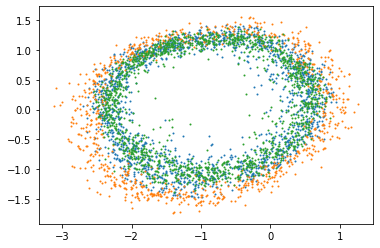

In [32]:
scatter_latent_control(dataset, 0, '#1f77b4')
scatter_latent_control(dataset, 1, '#ff7f0e')
scatter_latent_control(dataset, 2, '#2ca02c')

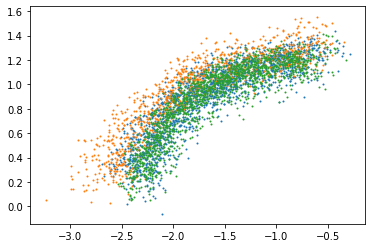

In [33]:
scatter_latent_control_test(dataset, 0, '#1f77b4')
scatter_latent_control_test(dataset, 1, '#ff7f0e')
scatter_latent_control_test(dataset, 2, '#2ca02c')

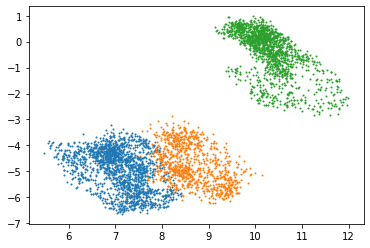

In [34]:
scatter_latent_stroke(dataset, 0, '#1f77b4')
scatter_latent_stroke(dataset, 1, '#ff7f0e')
scatter_latent_stroke(dataset, 2, '#2ca02c')

In [28]:
dataset = SmoothCurve("data/threecurves.csv")
hp.dropout = 0.1
hp.Nz = 2
hp.M = 5
hp.wKL = 1.0
hp.KL_delta = 0.01
hp.KL_start = 0.002
hp.enc_hidden_size = 128  # 256
hp.dec_hidden_size = 256
hp.KL_min = 0.0
hp.lr = 0.001
hp.lr_decay = 0.995
model1 = SketchRNN_Control()
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=0)

Loaded 1715 segments of style 0
Shape: (1715, 4, 100)
Loaded 912 segments of style 1
Shape: (912, 4, 100)
Loaded 1469 segments of style 2
Shape: (1469, 4, 100)


In [29]:
for i in range(300):
    model1.train(dataloader, i)

Epoch 0 Loss KL 0.0004914580495096743 Loss R 2.8278825283050537
Epoch 1 Loss KL 0.0017741038464009762 Loss R 2.771678924560547
Epoch 2 Loss KL 0.002819728571921587 Loss R 4.011075496673584
Epoch 3 Loss KL 0.0034590004943311214 Loss R 2.829315423965454
Epoch 4 Loss KL 0.0026973364874720573 Loss R 2.2423183917999268
Epoch 5 Loss KL 0.002733261091634631 Loss R 2.238746404647827
Epoch 6 Loss KL 0.001948842778801918 Loss R 1.8534018993377686
Epoch 7 Loss KL 0.0019082757644355297 Loss R 1.7830873727798462
Epoch 8 Loss KL 0.001640808186493814 Loss R 2.153676748275757
Epoch 9 Loss KL 0.0011713182320818305 Loss R 2.0972304344177246
Epoch 10 Loss KL 0.0009250083821825683 Loss R 1.5430501699447632
Epoch 11 Loss KL 0.0008215029374696314 Loss R 1.944246768951416
Epoch 12 Loss KL 0.0007916177855804563 Loss R 1.4829119443893433
Epoch 13 Loss KL 0.0009320516255684197 Loss R 1.5233210325241089
Epoch 14 Loss KL 0.0009330905741080642 Loss R 2.3555800914764404
Epoch 15 Loss KL 0.001011245185509324 Loss R 

Epoch 125 Loss KL 0.00016863402561284602 Loss R 0.5583130717277527
Epoch 126 Loss KL 8.657018770463765e-05 Loss R -0.05963055416941643
Epoch 127 Loss KL 1.801280814106576e-05 Loss R 0.5015119910240173
Epoch 128 Loss KL 5.6406377552775666e-05 Loss R -0.216191828250885
Epoch 129 Loss KL 4.858721877099015e-05 Loss R -0.13976417481899261
Epoch 130 Loss KL 2.648193003551569e-05 Loss R -0.765958309173584
Epoch 131 Loss KL 3.052821921301074e-05 Loss R -0.2281561642885208
Epoch 132 Loss KL 7.41051699151285e-05 Loss R -0.3947785198688507
Epoch 133 Loss KL 4.266009636921808e-05 Loss R -0.36065980792045593
Epoch 134 Loss KL 5.7042812841245905e-05 Loss R 0.6889607310295105
Epoch 135 Loss KL 8.222901669796556e-05 Loss R -0.02942550554871559
Epoch 136 Loss KL 0.0005984460585750639 Loss R -0.25989803671836853
Epoch 137 Loss KL 8.573405648348853e-05 Loss R -0.1500803679227829
Epoch 138 Loss KL 3.8431833672802895e-05 Loss R 0.07915317267179489
Epoch 139 Loss KL 6.72098612994887e-05 Loss R 0.03345930203

Epoch 248 Loss KL 0.00020909600425511599 Loss R -1.043042540550232
Epoch 249 Loss KL 0.0001346740173175931 Loss R -0.8533656597137451
Epoch 250 Loss KL 6.768065941287205e-05 Loss R -0.46746528148651123
Epoch 251 Loss KL 5.5377076932927594e-05 Loss R -1.0788633823394775
Epoch 252 Loss KL 8.285658259410411e-05 Loss R -1.3281631469726562
Epoch 253 Loss KL 7.21809410606511e-05 Loss R -1.2423789501190186
Epoch 254 Loss KL 0.00011938611714867875 Loss R -1.0697944164276123
Epoch 255 Loss KL 8.316593448398635e-05 Loss R -0.014668092131614685
Epoch 256 Loss KL 9.459838474867865e-05 Loss R -1.484440565109253
Epoch 257 Loss KL 9.266949200537056e-05 Loss R -0.6517820358276367
Epoch 258 Loss KL 0.00010156554344575852 Loss R -0.7140238285064697
Epoch 259 Loss KL 6.041161032044329e-05 Loss R -1.3385655879974365
Epoch 260 Loss KL 6.181605567689985e-05 Loss R -0.33838748931884766
Epoch 261 Loss KL 4.730175714939833e-05 Loss R -1.6707558631896973
Epoch 262 Loss KL 9.194253652822226e-05 Loss R 0.02599468

In [15]:
hp.lr = 0.0004
for i in range(200, 300):
    model1.train(dataloader, i)

Epoch 200 Loss KL 0.018958644941449165 Loss R -0.060988690704107285
Epoch 201 Loss KL 0.017385175451636314 Loss R -0.2815326452255249
Epoch 202 Loss KL 0.017695248126983643 Loss R 0.1404048502445221
Epoch 203 Loss KL 0.01865800842642784 Loss R -0.27371522784233093
Epoch 204 Loss KL 0.017834918573498726 Loss R -0.5067554116249084
Epoch 205 Loss KL 0.018625054508447647 Loss R 0.6697233319282532
Epoch 206 Loss KL 0.018122894689440727 Loss R -0.39584487676620483
Epoch 207 Loss KL 0.016362598165869713 Loss R 0.7601092457771301
Epoch 208 Loss KL 0.01790909469127655 Loss R 2.067540168762207
Epoch 209 Loss KL 0.018291831016540527 Loss R 0.3657526671886444
Epoch 210 Loss KL 0.018448511138558388 Loss R -0.06284880638122559
Epoch 211 Loss KL 0.017836833372712135 Loss R 0.41857248544692993
Epoch 212 Loss KL 0.01910092495381832 Loss R -0.013639602810144424
Epoch 213 Loss KL 0.0186189953237772 Loss R -0.17961335182189941
Epoch 214 Loss KL 0.017593063414096832 Loss R 0.2859055697917938
Epoch 215 Loss

In [4]:
# trained for 300 epoches
#hp.dropout = 0.1
#hp.Nz = 2
#hp.M = 5
#hp.wKL = 1.0
#hp.KL_start = 0.01  KL remains constant
#hp.KL_min = 0.0
#hp.lr = 0.001

saved_encoder = torch.load("encoderRNN_sel_0.014624_epoch_280.pth")
saved_decoder = torch.load("decoderRNN_sel_0.014624_epoch_280.pth")
model1.encoder.load_state_dict(saved_encoder)
model1.decoder.load_state_dict(saved_decoder)

<All keys matched successfully>

Encoded style:  [1. 0. 0.]


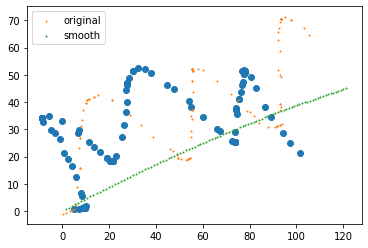

In [33]:
hp.temperature = 0.8
hp.M = 5
idx = 1000
data, style = dataset[idx]
controldx = data[2, :].copy()
controldy = data[3, :].copy()
inputs = torch.FloatTensor(data[2:, :]).cuda().unsqueeze(0).permute(2, 0, 1)
labels = torch.FloatTensor(style).cuda().unsqueeze(0)
xs, ys, dx, dy = model1.conditional_generation(inputs, labels)
plt.scatter(xs, ys)
#controlx = np.cumsum(controldx)
#controly = np.cumsum(controldy)
#plt.plot(controlx, controly)
dataset.visualize(idx)
#plt.plot(dx)
#plt.plot(dy)
#dataset.visualize_d(idx)

In [17]:
def scatter_latent(dataset, style, color):
    x1 = []
    x2 = []
    for i in range(len(dataset)):
        data, labels = dataset[i]
        if labels[style] < 0.5:
            continue
        inputs = torch.FloatTensor(data[2:, :]).cuda().unsqueeze(0).permute(2, 0, 1)
        labels = torch.FloatTensor(labels).cuda().unsqueeze(0)

        model1.encoder.train(False)
        z, mu, sigma_hat = model1.encoder(inputs, labels)
        z = z.squeeze().detach().cpu().numpy()
        x1.append(z[0])
        x2.append(z[1])
    plt.scatter(x1, x2, s=1, c=color)

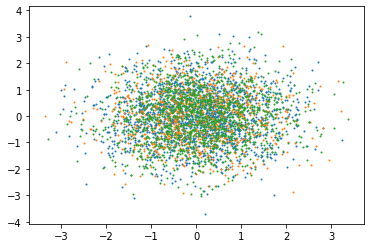

In [34]:
scatter_latent(dataset, 0, '#1f77b4')
scatter_latent(dataset, 1, '#ff7f0e')
scatter_latent(dataset, 2, '#2ca02c')

In [19]:
def scatter_latent_test(dataset, style, color):
    x1 = []
    x2 = []
    for i in range(len(dataset)):
        data, labels = dataset[i]
        if labels[style] < 0.5:
            continue
        if data[2, 0] < 0:
            data[2, :] *= -1.0
        if data[3, 0] < 0:
            data[3, :] *= -1.0
        inputs = torch.FloatTensor(data[2:, :]).cuda().unsqueeze(0).permute(2, 0, 1)
        labels = torch.FloatTensor(labels).cuda().unsqueeze(0)

        model1.encoder.train(False)
        z, mu, sigma_hat = model1.encoder(inputs, labels)
        z = z.squeeze().detach().cpu().numpy()
        x1.append(z[0])
        x2.append(z[1])
    plt.scatter(x1, x2, s=1, c=color)

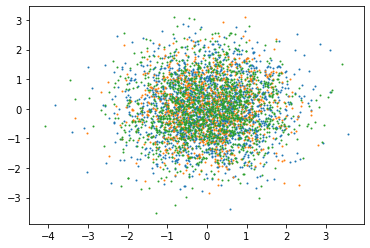

In [35]:
scatter_latent_test(dataset, 0, '#1f77b4')
scatter_latent_test(dataset, 1, '#ff7f0e')
scatter_latent_test(dataset, 2, '#2ca02c')